<a href="https://www.kaggle.com/code/devajitpatar/mnist-dataset?scriptVersionId=113132990" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
#Size of X_train in dataset
len(X_train)

60000

In [5]:
#Size of X_test in dataset
len(X_test)

10000

In [6]:
#Dimension of the image
X_train[0].shape

(28, 28)

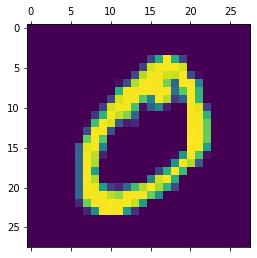

In [7]:
plt.matshow(X_train[1])

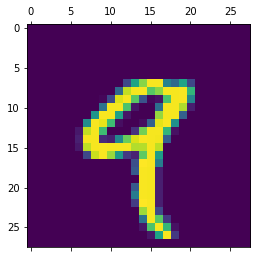

In [8]:
plt.matshow(X_train[4])

In [9]:
y_train[1]

0

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [11]:
X_train.shape


(60000, 28, 28)

In [12]:
X_train=X_train/255
X_test=X_test/255

In [13]:
#28x28 dimensional image  convert to one dimensional we will get (60000,784)
X_train_flatten=X_train.reshape(len(X_train),28*28)
X_test_flatten=X_test.reshape(len(X_test),28*28)

In [14]:
print(X_train_flatten.shape)
X_test_flatten.shape

(60000, 784)


(10000, 784)

In [15]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])

2022-12-06 20:42:41.429761: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [16]:
model.compile(
optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
model.fit(X_train_flatten,y_train,epochs=10)

2022-12-06 20:42:42.605365: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4656 - accuracy: 0.8782
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3040 - accuracy: 0.9150
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2837 - accuracy: 0.9202
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9236
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2661 - accuracy: 0.9258
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2621 - accuracy: 0.9268
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2585 - accuracy: 0.9282
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2554 - accuracy: 0.9294
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2528 - accuracy: 0.9305
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.251

In [18]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2652 - accuracy: 0.9273


[0.2652183473110199, 0.927299976348877]

Number is :  6


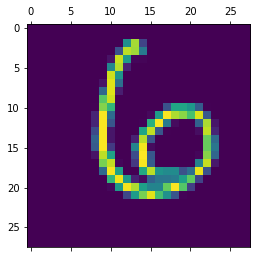

In [19]:
x=100
plt.matshow(X_test[x])
y_pred=model.predict(X_test_flatten)
print("Number is : ",np.argmax(y_pred[x]))